# How to conduct a simple name search

After installing the clusterpluck package, this tutorial demonstrates how to search for an open cluster using just its name.

First, import the module and classes.

In [1]:
import clusterpluck as cp
from clusterpluck.gaia import Refine, Info, Plotting
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

Then, perform the search, downloading the basic cluster data from the [SIMBAD Astronomical Database](http://simbad.u-strasbg.fr/simbad/) and the individual star data from the [Gaia archive](https://gea.esac.esa.int/archive/). The default search is processed using Gaia DR2.

The name of the cluster must be in a string and must also be in a recognised format, i.e. M.. for Messier catalogue, NGC.. for New General Catalogue, etc. It is possible that lesser known catalogues can be used but they may cause an error if the format doesn't match SIMBAD's.

The results will be downloaded and stored as a CSV file.

In [2]:
cp.search_name('M47')

Number of stars: 992
RA: 07 36 35 Dec: -14 29.3 Rad: 0.5
PM_RA: -7.02 PM_Dec: 0.9592 PM_Rad: 2
Distance range: 242 pc to 725 pc


Messier 47 is an open cluster in Cancer. The output of the search contains the following information:

- The number of stars downloaded from the Gaia database.
- The right ascention (RA), declination (Dec) and search radius of the cluster. This is its position in the sky and it's size.
- The proper motion RA, Dec and proper motion search radius. This is the rate of cluster's apparent movement across the sky. Cluster stars will all share approximately the same apparent movement and so will form a tight group when these data are plotted.
- Finally, the distance range of the search. This helps filter out lots of stars that are unrelated but can also cause cluster stars to be lost. In particular any objects further than 1 kpc (1000 pc) away can suffer from this.

Any or all of these can be amended by using the general `search()` method but that is for another tutorial.

Now let's use the `load()` method to load the data into a Pandas dataframe.

In [3]:
t = cp.load()

We can check the contents of the dataframe using simple pandas commands.

In [4]:
t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992 entries, 0 to 991
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             992 non-null    object 
 1   otypes           992 non-null    object 
 2   parallax         992 non-null    float64
 3   parallax_error   992 non-null    float64
 4   pmra             992 non-null    float64
 5   pmra_error       992 non-null    float64
 6   pmdec            992 non-null    float64
 7   pmdec_error      992 non-null    float64
 8   bp_rp            992 non-null    float64
 9   phot_g_mean_mag  992 non-null    float64
 10  ra               992 non-null    float64
 11  dec              992 non-null    float64
 12  distance         992 non-null    float64
 13  distance_error   992 non-null    float64
 14  m_v_tycho        992 non-null    float64
 15  b_v              992 non-null    float64
 16  abs              992 non-null    float64
 17  t_k             

As you can see the `load()` method takes some time to complete. That's because it's doing a lot of work. The parallax is converted into a distance in parsecs, the gaia g magnitude and colour index is converted into a more standardized Tycho magnitude and b - v colour index. From these the approximate stellar absolute magnitude, effective temperature and luminosity is calculated.

Then a simple cluster probability algorithm is run to help classify stars by giving them a percentage style 'rating' based on their proximity to the centeroids of the position, distance and proper motion of the cluster.

Finally, a matching algorithm runs through all the objects and compares their RA and DEC to a list of objects in the SIMBAD catalogue. If these match the name of the object and its [object type](https://simbad.u-strasbg.fr/simbad/sim-display?data=otypes) is added to the dataframe and saved in CSV format.

The dataframe is in descending g (green) magnitude order.

In [5]:
t

,name,otypes,parallax,parallax_error,pmra,pmra_error,pmdec,pmdec_error,bp_rp,phot_g_mean_mag,ra,dec,distance,distance_error,m_v_tycho,b_v,abs,t_k,lum_s,prob
0,HD 60855,**|*|Em*|Be*|V*|IR|UV|X,2.077637,0.207615,-7.109151,0.155182,0.780030,0.133099,-0.118344,5.627999,114.016190,-14.492770,481.315959,43.727498,5.641895,-0.150834,-2.770256,11890.825947,1182.078739,79.900015
1,HD 61224,**|*|Em*|Be*|IR|UV,2.012069,0.106906,-7.138949,0.080708,1.145077,0.083712,0.081778,6.473912,114.411640,-14.440757,497.000887,25.074589,6.499310,-0.011235,-1.982476,9207.670048,572.182144,38.532447
2,HD 61017,X|**|*|IR,2.021288,0.100697,-7.310861,0.086194,0.785335,0.074871,-0.002212,6.655011,114.171852,-14.443610,494.734135,23.477293,6.673285,-0.069918,-1.798574,10152.913748,483.029546,80.101179
3,HD 61114,*|IR,1.743823,0.067370,-7.792587,0.054587,2.608254,0.045973,2.395475,6.861200,114.285469,-14.324596,573.452773,21.330566,8.088121,1.639623,-0.704367,2807.316771,176.315618,0.522240
4,HD 60998,*|UV|**|IR,1.865338,0.091669,-7.078137,0.070441,1.084258,0.063201,-0.031709,6.872384,114.150463,-14.484610,536.095954,25.111499,6.888938,-0.090495,-1.757274,10538.810106,465.000918,69.543404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,,,2.101019,2.697285,-5.451604,1.943831,-0.055180,2.318828,1.512276,20.853565,114.108059,-14.141460,475.959477,267.552516,21.434158,1.004453,13.046308,3775.135396,0.000557,0.759856
988,,,3.006464,3.076210,-5.971694,2.067749,-0.149494,2.225318,1.086000,20.883945,114.298768,-14.845272,332.616656,168.215278,21.223415,0.699234,13.613695,4545.307747,0.000330,0.329157
989,,,3.919975,4.900724,-5.411766,3.079569,-0.184064,4.386642,1.416664,20.885458,114.524786,-14.436349,255.103698,141.733991,21.407289,0.935868,14.373705,3923.316770,0.000164,0.007395
990,,,4.023713,3.740082,-6.316390,3.189567,1.229143,2.255890,1.818579,20.899426,113.957239,-14.413898,248.526653,119.723675,21.684544,1.224519,14.707679,3369.758463,0.000121,0.539806


Once the data are loaded to a variable we can check to see if we have a cluster. Using the `Refine` class, let's see how the proper motion plot, `pm_plot()`, looks.

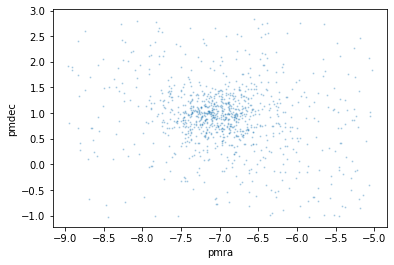

In [6]:
Refine.pm_plot(t)

We can see the cluster's stars are forming a group right in the middle of the plot. That means SIMBAD has given us good proper motion data and the default proper motion radius is acceptable. Any closer and we would lose relevent star data. Further away and there would be mnore chance of unrelated stars being included.

Now let's look at a plot of the cluster as a star map, `map()`.

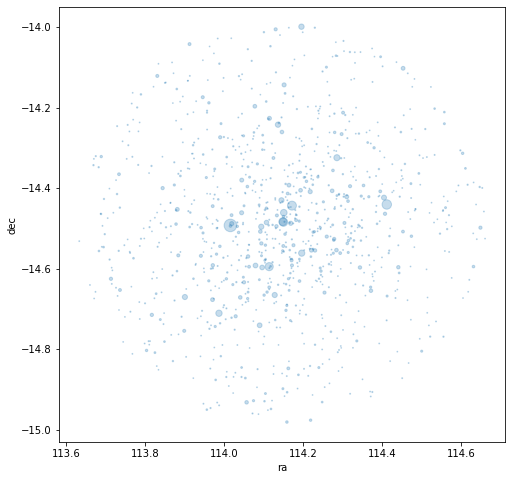

In [7]:
Refine.map(t)

This plot shows a star map of the search with the star size proportional to their magnitude. It can help show us if our search radius is too wide or narrow. This looks pretty good as the cluster appears fully contained.

Now let's see if the distance filter has correct values using the `d_hist()`. This produces a simple histogram of the stellar distances.

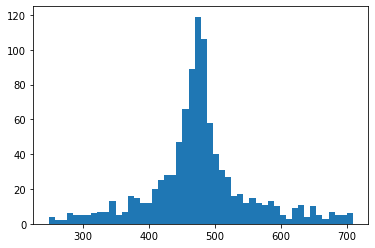

In [8]:
Refine.d_hist(t)

There is a very clear, tall peak in the middle of our graph that tells us the cluster stars are clearly outnumbering the unrelated stars. We can also see roughly how far away the cluster is in parsecs just by looking. The distance filter doesn't need refining either. So that is all the parameters involved with the search.

However let's have a look at two of the features we can draw from this data; a colour magnitude diagram and a more precise measurement of the distance.

Using the `Plotting` class, we can call the `cmd()` instance which uses values of g magnitude and the gaia bp-rp colour index...

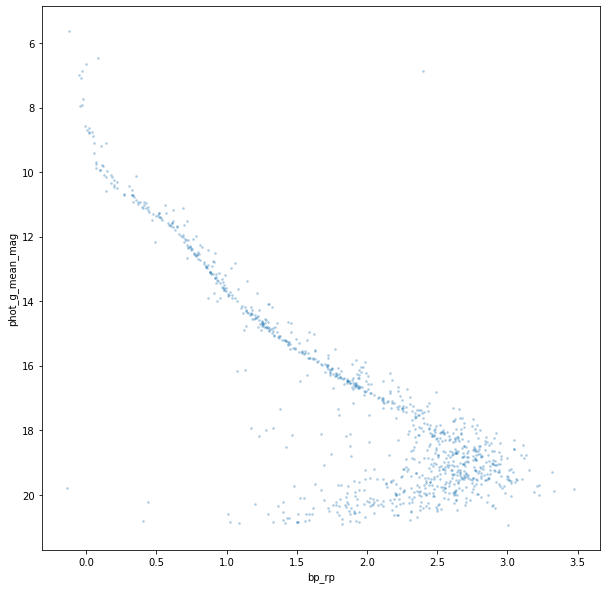

In [10]:
Plotting.cmd(t)

... and we have a beautiful CMD plot with the classic *main sequence* of stars running from top left to bottom right. These stars are in the middle of their lives, burning Helium in their cores in a relatively stable way just like our sun. The stars above the main sequence are mainly multiple star systems that have a slightly higher luminosity.

Other features are the brightest stars at the top which appear to just be 'curling' upwards. This is called the *main sequence turn off*. The stars here are running low on core Helium and starting to evolve into *red giants*. They're not quite at that point but the position of the turn off is a major method of ageing clusters. At the other end are the red and white dwarfs.

Finally, use the `Info` class `dist()` instance to extract a calculated distance from the parallax data including a 2-sigma range.

In [11]:
Info.dist(t)

Distance: 474 pc
5%: 341 pc - 95%: 632
